In [1]:
import rebound
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import re

In [3]:
sa  = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/hpc/v1/sim_01_frag.bin") # Merc - Safe - 11
# sa2 = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.2_frag.bin") # Merc - Safe - 0
# sa3 = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.3_frag.bin") # Merc - NotSafe - 11
# sa4 = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.4_frag.bin") # Merc - NotSafe - 0
# sa5 = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.5_frag.bin") # Ias15
# sa6 = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.6_frag.bin") # Merc - NotSafe - 11 - recalc - dt=6
# sa4 = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.8_frag.bin") # Merc - NotSafe - 11 - recalc - dt=1
# sa = rebound.SimulationArchive("../inputs/sim_inits/sim_01_frag.bin")
num_saves = len(sa)
num_saves

261

In [7]:
def regex_decimal_number(string):
    return float(re.findall(r"[-+]?\d*\.\d+|\d+", string)[0])

def regex_sci_number(string):
    return float(re.findall(r"[+\-]?(?:0|[1-9]\d*)(?:\.\d+)?(?:[eE][+\-]?\d+)?", string)[0])

In [9]:
coll_time = []; E_lost = []
coll_time2 = []; E_lost2 = []
coll_time3 = []; E_lost3 = []
coll_time4 = []; E_lost4 = []
coll_time5 = []; E_lost5 = []
coll_time6 = []; E_lost6 = []
with open("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.1_frag.log", 'r') as f:
    log = f.readlines()
for line in log:
    if 'COLLISION TIME' in line:
        coll_time.append(regex_decimal_number(line)) # Find arbitrary decimal number
    if 'Energy' in line:
        E_lost.append(regex_sci_number(line)) # find arbitrary scientific value

with open("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.2_frag.log", 'r') as f:
    log = f.readlines()
for line in log:
    if 'COLLISION TIME' in line:
        coll_time2.append(regex_decimal_number(line)) # Find arbitrary decimal number
    if 'Energy' in line:
        E_lost2.append(regex_sci_number(line)) # find arbitrary scientific value

with open("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.3_frag.log", 'r') as f:
    log = f.readlines()
for line in log:
    if 'COLLISION TIME' in line:
        coll_time3.append(regex_decimal_number(line)) # Find arbitrary decimal number
    if 'Energy' in line:
        E_lost3.append(regex_sci_number(line)) # find arbitrary scientific value

with open("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.8_frag.log", 'r') as f:
    log = f.readlines()
for line in log:
    if 'COLLISION TIME' in line:
        coll_time4.append(regex_decimal_number(line)) # Find arbitrary decimal number
    if 'Energy' in line:
        E_lost4.append(regex_sci_number(line)) # find arbitrary scientific value

with open("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.5_frag.log", 'r') as f:
    log = f.readlines()
for line in log:
    if 'COLLISION TIME' in line:
        coll_time5.append(regex_decimal_number(line)) # Find arbitrary decimal number
    if 'Energy' in line:
        E_lost5.append(regex_sci_number(line)) # find arbitrary scientific value

with open("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/raw/sim_01.6_frag.log", 'r') as f:
    log = f.readlines()
for line in log:
    if 'COLLISION TIME' in line:
        coll_time6.append(regex_decimal_number(line)) # Find arbitrary decimal number
    if 'Energy' in line:
        E_lost6.append(regex_sci_number(line)) # find arbitrary scientific value

coll_time, E_lost, coll_time2, E_lost2, coll_time3, E_lost3, coll_time4, E_lost4, coll_time5, E_lost5, coll_time6, E_lost6

([2715.574078, 3196.584531, 3214.119295, 4759.403516],
 [-4.123136e-17, -5.655147e-14, -3.227378e-15, -1.636977e-13],
 [2715.574078, 3196.584531, 3214.119295],
 [-4.123136e-17, -5.655147e-14, -3.227383e-15],
 [1126.323776, 1996.76921, 2134.457106, 2602.763983],
 [-2.208414e-16, -8.55132e-17, -1.810445e-16, -6.23712e-17],
 [44.260837, 338.906233, 2324.753922],
 [-8.212356e-17, -1.061694e-13, 1.436909e-16],
 [44.261388, 1173.787766, 2102.230705, 2985.40607, 4049.498707],
 [-8.151633e-17, 8.261245e-18, -4.684019e-13, 8.335147e-16, -2.010944e-13],
 [1126.323776, 3526.699207],
 [-2.208414e-16, 9.405951e-16])

In [10]:
E0 = sa[0].calculate_energy()

dE = []; offset_index = 0; E_off = 0
dE2 = []; offset_index2 = 0; E_off2 = 0
dE3 = []; offset_index3 = 0; E_off3 = 0
dE4 = []; offset_index4 = 0; E_off4 = 0
dE5 = []; offset_index5 = 0; E_off5 = 0
dE6 = []; offset_index6 = 0; E_off6 = 0
times = []
# time3 = []

for i in range(len(sa)):
    sim = sa[i]; times.append(sim.t)
    sim.integrator_synchronize()
    if offset_index < len(coll_time)-1 and sim.t/365.25 > coll_time[offset_index]:
        E_off += E_lost[offset_index]; offset_index += 1
    dE.append(abs((sim.calculate_energy() + E_off - E0)/E0))

    sim2 = sa2[i]
    sim2.integrator_synchronize()
    if offset_index2 < len(coll_time2)-1 and sim2.t/365.25 > coll_time2[offset_index2]:
        E_off2 += E_lost2[offset_index2]; offset_index2 += 1
    dE2.append(abs((sim2.calculate_energy() + E_off2 - E0)/E0))

    sim3 = sa3[i]
    sim3.integrator_synchronize()
    if offset_index3 < len(coll_time3)-1 and sim3.t/365.25 > coll_time3[offset_index3]:
        E_off3 += E_lost3[offset_index3]; offset_index3 += 1
    dE3.append(abs((sim3.calculate_energy() + E_off3 - E0)/E0))

    sim4 = sa4[i]
    sim4.integrator_synchronize()
    if offset_index4 < len(coll_time4)-1 and sim4.t/365.25 > coll_time4[offset_index4]:
        E_off4 += E_lost4[offset_index4]; offset_index4 += 1
    dE4.append(abs((sim4.calculate_energy() + E_off4 - E0)/E0))

    sim5 = sa5[i]
    sim5.integrator_synchronize()
    if offset_index5 < len(coll_time5)-1 and sim5.t/365.25 > coll_time5[offset_index5]:
        E_off5 += E_lost5[offset_index5]; offset_index5 += 1
    dE5.append(abs((sim5.calculate_energy() + E_off5 - E0)/E0))

    sim6 = sa6[i]
    sim6.integrator_synchronize()
    if offset_index6 < len(coll_time6)-1 and sim6.t/365.25 > coll_time6[offset_index6]:
        E_off6 += E_lost6[offset_index6]; offset_index6 += 1
    dE6.append(abs((sim6.calculate_energy() + E_off6 - E0)/E0))

    
    
# for i in range(len(sa3)):
#     sim3 = sa3[i]
#     dE3.append(abs((sim3.calculate_energy() - E03)/E03))
#     sim3.integrator_synchronize()
#     time3.append(sim3.t)

/Users/rmelikyan/Projects/collresolve/.venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/Users/rmelikyan/Projects/collresolve/.venv/lib/python3.9/site-packages/rebound/simulationarchive.py:148: RuntimeWarning: The simulation might not be synchronized. You can manually synchronize it by calling sim.integrator_synchronize().
  warnings.warn("The simulation might not be synchronized. You can manually synchronize it by calling sim.integrator_synchronize().", RuntimeWarning)


In [11]:
E0

-3.2654065935230094e-08

(2.618683638362661e-07, 1.3707159471048294e-08)

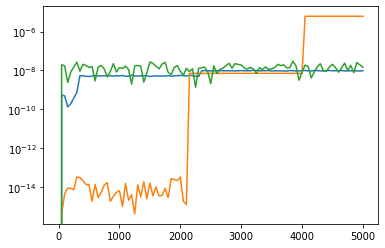

In [13]:
# plt.semilogy(np.array(times[:])/365.25, dE[:])
# plt.semilogy(np.array(times[:])/365.25, dE2[:])
# plt.semilogy(np.array(times[:])/365.25, dE3[:])
plt.semilogy(np.array(times[:])/365.25, dE4[:])
plt.semilogy(np.array(times[:])/365.25, dE5[:])
plt.semilogy(np.array(times[:])/365.25, dE6[:])
np.mean(dE[:]), np.mean(dE6[:])

In [67]:
sim.calculate_com()

<rebound.particle.Particle object at 0x12c8a8440, m=1.001248511567565 x=-7.524124067481369 y=-11.400300390252 z=-0.07694157856770191 vx=-4.1166920540501885e-06 vy=-6.243445883888336e-06 vz=-4.215182123243569e-08>

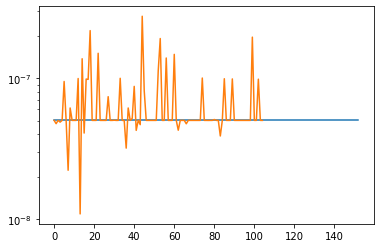

In [17]:
plt.semilogy([p.m for p in sa[0].particles if p.m < 1e-4])
plt.semilogy([p.m for p in sa[-1].particles if p.m < 1e-4])

In [77]:
sa  = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/hpc/v2/sim_33_frag.bin")

Text(0.5, 1.0, 'Group 2')

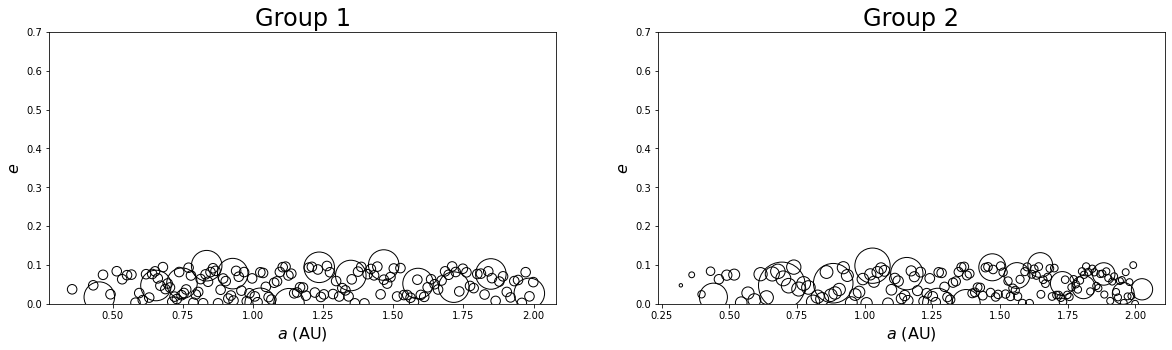

In [133]:
fig, axs = plt.subplots(1, 2, figsize = (20, 5))
plt.sca(axs[0])
sa  = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/hpc/v2/sim_23_frag.bin")
m0 = np.array([p.m/3.003e-6 for p in sa[0].particles[1:-2]])
a0 = np.array([p.a for p in sa[0].particles[1:-2]])
e0 = np.array([p.e for p in sa[0].particles[1:-2]])
plt.scatter(a0, e0, s=10000*m0, facecolor='none', edgecolors='black')
plt.ylim(0,.7); plt.xlabel('$a$ (AU)', fontsize = 16); plt.ylabel('$e$', fontsize = 16)
plt.title('Group 1', fontsize = 24)

plt.sca(axs[1])
sa  = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/hpc/v2/sim_33_frag.bin")
m1 = np.array([p.m/3.003e-6 for p in sa[0].particles[1:-2]])
a1 = np.array([p.a for p in sa[0].particles[1:-2]])
e1 = np.array([p.e for p in sa[0].particles[1:-2]])
plt.scatter(a1, e1, s=10000*m1, facecolor='none', edgecolors='black')
plt.ylim(0,.7); plt.xlabel('$a$ (AU)', fontsize = 16); plt.ylabel('$e$', fontsize = 16)
plt.title('Group 2', fontsize = 24)
# plt.savefig('figures/initial_conditions_2s_3s.png', dpi=300)

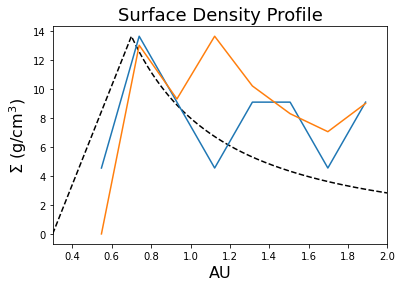

In [147]:
ath = np.linspace(0.3, 2, 1000)
slope = 8*0.7**-(3/2)/(.7-.3)
intercept = -slope*0.3
surf_dens = [slope*a + intercept if a<0.7 else 8*a**-(3/2) for a in ath]
plt.plot(ath, surf_dens, color = 'k', ls = '--')
plt.xlim(0.3, 2)
plt.xlabel('AU', fontsize=16)
plt.ylabel('$\Sigma$ (g/cm$^3$)', fontsize=16)
plt.title('Surface Density Profile', fontsize=18)
# plt.savefig('figures/sfp.png', dpi=300)
values, bins = np.histogram(a0[:14], weights=m0[:14], bins=8, density=True)
points = [np.mean(bins[i:i+2]) for i in range(len(bins)-1)]
plt.plot(points, values/max(values)*max(surf_dens))
values, bins = np.histogram(a1[:14], weights=m1[:14], bins=bins, density=True)
points = [np.mean(bins[i:i+2]) for i in range(len(bins)-1)]
plt.plot(points, values/max(values)*max(surf_dens))

In [146]:
m0>0.08

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [78]:
sa[-1].t/365.25/1e6

11.31

In [79]:
sa[300].t/365.25/1e6

3.0

Text(0.5, 1.0, '11.31 My')

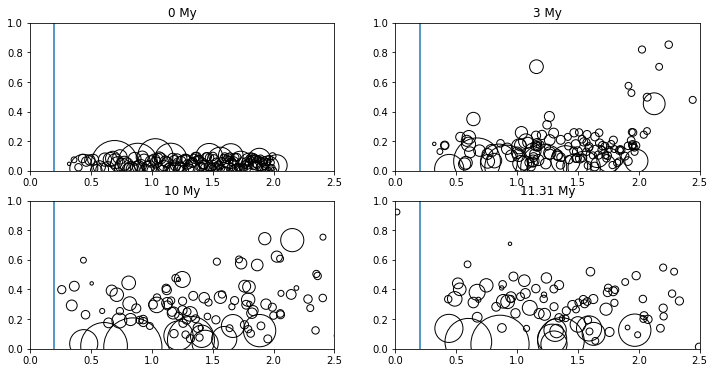

In [81]:
m0 = np.array([p.m/3.003e-6 for p in sa[0].particles[1:-2]])
a0 = np.array([p.a for p in sa[0].particles[1:-2]])
e0 = np.array([p.e for p in sa[0].particles[1:-2]])

m3 = np.array([p.m/3.003e-6 for p in sa[300].particles[1:-2]]) # 3 myr
a3 = np.array([p.a for p in sa[300].particles[1:-2]]) # 3 myr
e3 = np.array([p.e for p in sa[300].particles[1:-2]]) # 3 myr

m10 = np.array([p.m/3.003e-6 for p in sa[1000].particles[1:-2]]) # 10 myr
a10 = np.array([p.a for p in sa[1000].particles[1:-2]]) # 10 myr
e10 = np.array([p.e for p in sa[1000].particles[1:-2]]) # 10 myr

mf = np.array([p.m/3.003e-6 for p in sa[-1].particles[1:-2]]) # final state
af = np.array([p.a for p in sa[-1].particles[1:-2]]) # final state
ef = np.array([p.e for p in sa[-1].particles[1:-2]]) # final state

fig, axs = plt.subplots(2,2, figsize = (12,6))
plt.sca(axs[0,0])
plt.scatter(a0, e0, s=10000*m0, facecolor='none', edgecolors='black')
plt.ylim(0, 1); plt.xlim(0, 2.5); plt.axvline(0.2)
plt.title('0 My')
plt.sca(axs[0,1])
plt.scatter(a3, e3, s=10000*m3, facecolor='none', edgecolors='black')
plt.ylim(0, 1); plt.xlim(0, 2.5); plt.axvline(0.2)
plt.title('3 My')
plt.sca(axs[1,0])
plt.scatter(a10, e10, s=10000*m10, facecolor='none', edgecolors='black')
plt.ylim(0, 1); plt.xlim(0, 2.5); plt.axvline(0.2)
plt.title('10 My')
plt.sca(axs[1,1])
plt.scatter(af, ef, s=10000*mf, facecolor='none', edgecolors='black')
plt.ylim(0, 1); plt.xlim(0, 2.5); plt.axvline(0.2)
plt.title('{} My'.format(sa[-1].t/365.25/1e6))

/Users/rmelikyan/Projects/collresolve/.venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/Users/rmelikyan/Projects/collresolve/.venv/lib/python3.9/site-packages/rebound/simulationarchive.py:148: RuntimeWarning: The simulation might not be synchronized. You can manually synchronize it by calling sim.integrator_synchronize().
  warnings.warn("The simulation might not be synchronized. You can manually synchronize it by calling sim.integrator_synchronize().", RuntimeWarning)


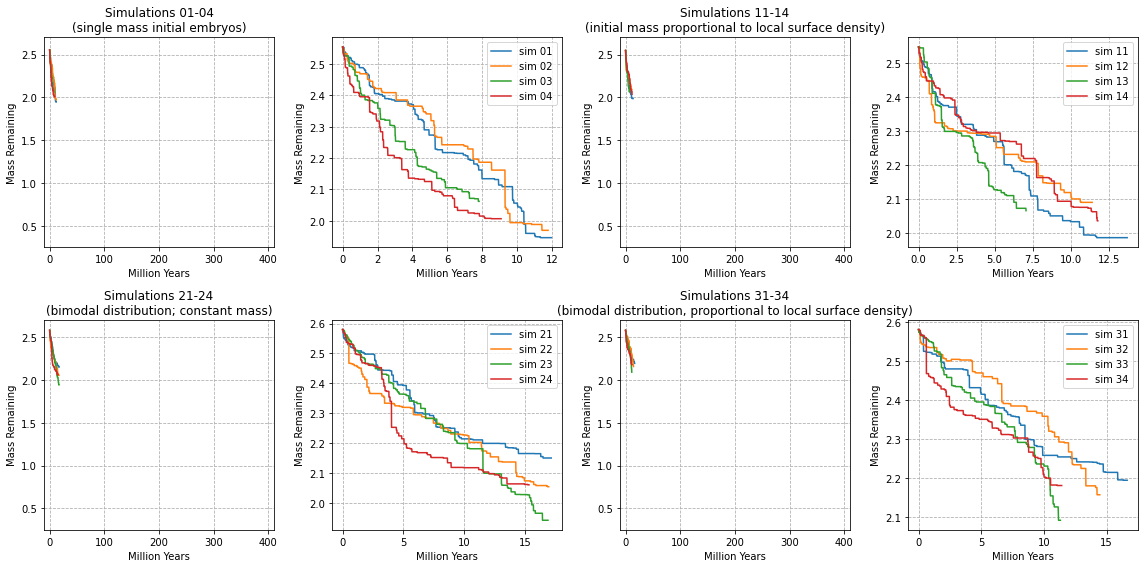

In [32]:
fig, axs = plt.subplots(2, 4, figsize = (16,8))
titles = ['01-04\n(single mass initial embryos)', '11-14\n(initial mass proportional to local surface density)',
 '21-24\n(bimodal distribution; constant mass)', '31-34\n(bimodal distribution, proportional to local surface density)']
for j, title in enumerate(titles):
    for i, sim_num in enumerate(['{}{}'.format(j, k) for k in range(1,5)]):
        sa = rebound.SimulationArchive("/Users/rmelikyan/Projects/collresolve/rebound_connection/data/hpc/v2/sim_{}_frag.bin".format(sim_num))
        initial_mass = sum([p.m for p in sa[0].particles if p.m < 1e-4])
        debris_mass_lost = initial_mass - sum([p.m for p in sa[-1].particles if p.m < 1e-4])
        plt.sca(axs[j//2, 2*(j%2)])
        plt.plot([sa[i].t/365.25/1e6 for i in range(len(sa))], [(sum([p.m for p in sa[i].particles if p.m < 1e-4]))/3.003e-6 for i in range(len(sa))])
        plt.xlabel('Million Years'); plt.ylabel('Mass Remaining')
        plt.xlim(-10, 410); plt.ylim(0.25, 2.7); plt.grid(ls = '--')
        plt.title('Simulations {}'.format(title))

        plt.sca(axs[j//2, 2*(j%2) + 1])
        plt.plot([sa[i].t/365.25/1e6 for i in range(len(sa))], [(sum([p.m for p in sa[i].particles if p.m < 1e-4]))/3.003e-6 for i in range(len(sa))], label = 'sim {}'.format(sim_num))
        plt.xlabel('Million Years'); plt.ylabel('Mass Remaining')
        plt.grid(ls = '--')
    plt.legend()
fig.tight_layout()
plt.show()


In [45]:
(2*5.014340e-08) - 1.000088e-07

2.7800000000001083e-10

In [20]:
tot_mass = np.zeros(num_saves)
max_mass = np.zeros(num_saves)
min_mass = np.zeros(num_saves)
num_ps = np.zeros(num_saves)
times = np.zeros(num_saves)
# smas = np.zeros(num_saves)
for i in range(num_saves):
    sim = sa[i]
    sim.move_to_com()
    ps = sim.particles[1:-2]
    masses = [p.m*333000 for p in ps]
    smas = [p.a for p in ps]
    ecs = [p.e for p in ps]
    tot_mass[i] = sum(masses)
    max_mass[i] = max(masses)
    min_mass[i] = min(masses)
    num_ps[i] = len(ps)
    times[i] = sim.t/365.25

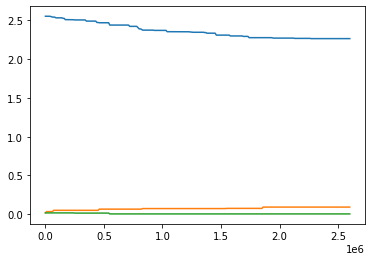

In [21]:
plt.plot(times, tot_mass)
plt.plot(times, max_mass)
plt.plot(times, min_mass)

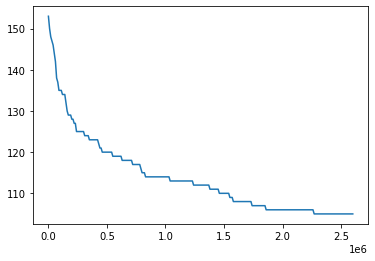

In [22]:
plt.plot(times, num_ps)

Text(0.39224218178566816, 0.05613899257700794, 'Max Mass: 0.092 $M_\\oplus$')

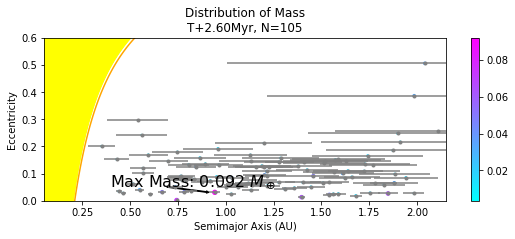

In [31]:
plt.figure(figsize=(9,3)); plt.xlim(0.05, 2.15); plt.ylim(0, .6)
plt.errorbar(smas, ecs, xerr=[a*e for a,e in zip(smas,ecs)], fmt='.', c='grey')
plt.colorbar(plt.scatter(smas, ecs, s=np.array(masses)*200, c=masses, cmap='cool'))
plt.title("Distribution of Mass\nT+{:.2f}Myr, N={:.0f}".format(times[-1]*1e-6, num_ps[-1]), fontsize=12); plt.xlabel('Semimajor Axis (AU)'); plt.ylabel('Eccentricity')
# circ  = plt.Circle((.12,.06), .085, color='orange'); plt.gca().add_patch(circ)
plt.plot(.21/(1-np.linspace(0, .65, 100)), np.linspace(0, .65, 100), c='orange')
# circ  = plt.Circle((.12,.06), .08, color='yellow'); plt.gca().add_patch(circ)
plt.plot(.2/(1-np.linspace(0, .65, 100)), np.linspace(0, .65, 100), c='yellow')
plt.fill_betweenx(np.linspace(0, .65, 100), .2/(1-np.linspace(0, .65, 100)), color = 'yellow')
plt.arrow(smas[np.argmax(masses)]-.25, ecs[np.argmax(masses)]+.02, .22, -.02, length_includes_head = True, width=.003, color = 'black')
plt.text(smas[np.argmax(masses)]-.55, ecs[np.argmax(masses)]+.025, 'Max Mass: {:.3f} $M_\oplus$'.format(max(masses)), fontsize=16)
# plt.savefig("/Users/rmelikyan/Projects/collresolve/rebound_connection/notebooks/figures/Merger_1myr_DoM.png", dpi=300, bbox_inches='tight', facecolor='white')

(array([ 1.,  1.,  1.,  4., 75.,  2.,  0.,  1.,  2.,  5.,  4.,  1.,  0.,
         0.,  2.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.0003614 , 0.00065533, 0.00094925, 0.00124318, 0.00153711,
        0.00183104, 0.00212497, 0.00241889, 0.00271282, 0.00300675,
        0.00330068, 0.0035946 , 0.00388853, 0.00418246, 0.00447639,
        0.00477032, 0.00506424, 0.00535817, 0.0056521 , 0.00594603,
        0.00623995, 0.00653388, 0.00682781, 0.00712174, 0.00741567,
        0.00770959, 0.00800352, 0.00829745, 0.00859138, 0.0088853 ,
        0.00917923]),
 <BarContainer object of 30 artists>)

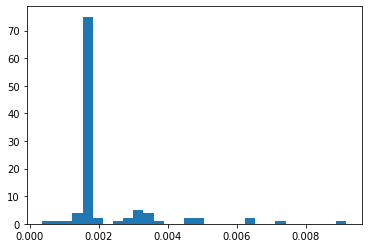

In [40]:
plt.hist([p.m*33300 for p in sa[-1].particles if p.m < 1e-4], 30)